In [1]:
import numpy as np

In [2]:
import random

def getD(G): 
    V = G.vertices()
    D = [None] + [(v,w,i) for v in V for w in G.neighbors(v) for i in [0,1]]
    return D
  
def twisted_faces(G):
    """
      We assume G is cubic for start.
    """ 
    V = G.vertices()
    D = getD(G)
    Rlist = []
    for v in V:
        N = G.neighbors(v)
        for i in range(3):
            Rlist.append((D.index((v,N[i],1)),D.index((v,N[(i+1)%3],0))))
            
    R = Permutation(Rlist)
    
    Llist = []
    E = G.edges(labels=None)
    twists = [random.randint(0,1) for _ in E]
    for (u,v),t in zip(E,twists):
        Llist.append((D.index((u,v,0)),D.index((v,u,t))))
        Llist.append((D.index((u,v,1)),D.index((v,u,(t+1)%2))))

        #Llist.append(((u,v,1),(v,u,(t+1)%2)))
        #Llist.append(None)
    L = Permutation(Llist)

        
    return R*L, R, L, D

In [23]:
G = graphs.PetersenGraph()

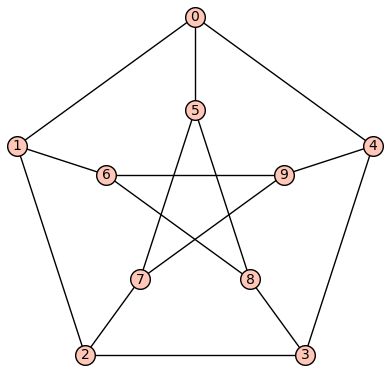

In [24]:
G.show()

In [3]:
def twisted_faces2(G, do_twist=True):
    """
      Now for general G. 
    """ 
    V = G.vertices()
    D = getD(G)
    Rlist = []
    for v in V:
        N = G.neighbors(v)
        d = len(N)
        random.shuffle(N)
        for x,y in zip(N,N[1:]+[N[0]]):
            Rlist.append((D.index((v,x,1)),D.index((v,y,0))))
            
    R = Permutation(Rlist)
    
    Llist = []
    E = G.edges(labels=None)
    if do_twist:
        twists = [random.randint(0,1) for _ in E]
    else:
        twists = [1 for _ in E]
    for (u,v),t in zip(E,twists):
        Llist.append((D.index((u,v,0)),D.index((v,u,t))))
        Llist.append((D.index((u,v,1)),D.index((v,u,(t+1)%2))))

        #Llist.append(((u,v,1),(v,u,(t+1)%2)))
        #Llist.append(None)
    L = Permutation(Llist)

        
    return R*L #, R, L, D

In [4]:
def sample_number_of_twisted_faces(G,samples=10,do_twist=True):
    return [len(twisted_faces2(G,do_twist=do_twist).cycle_type())/2 for _ in range(samples)]

def exp_size(L):
    return sum(L)/len(L)

In [5]:
def equal(e,f):
    return set(e[0:2])==set(f[0:2])

In [6]:
equal((1,0,1),(0,1,0))

True

In [29]:
K4 = graphs.CompleteGraph(4)

In [30]:
count_bad(K4)

NameError: name 'count_bad' is not defined

In [7]:
def check_tw_faces(G):
    F,R,L,D = twisted_faces2(G)
    print(list(zip(D,range(100))))
    C = F.cycle_tuples()
    m = G.num_edges()
    assert(len(D) == 4*m+1)
    U = reduce(lambda x,y: x.union(y), [set(x) for x in C], set([]))
    assert(len(U) == 4*m)
    print(R.cycle_tuples())
    for vert in R.cycle_tuples():
        for x in vert:
            print(D[x])
        print('--')
    print('\n ===== \n')

    print(L.cycle_tuples())
    for edge in L.cycle_tuples():
        for x in edge:
            print(D[x])
        print('--')            

    print('\n ===== \n')
    print(F.cycle_tuples())
    for face in C:
        for d in face:
            print(D[d])

In [76]:
K4 = graphs.CompleteGraph(4)

In [77]:
check_tw_faces(K4)

ValueError: too many values to unpack (expected 4)

In [78]:
F,D = twisted_faces(K4)

ValueError: too many values to unpack (expected 2)

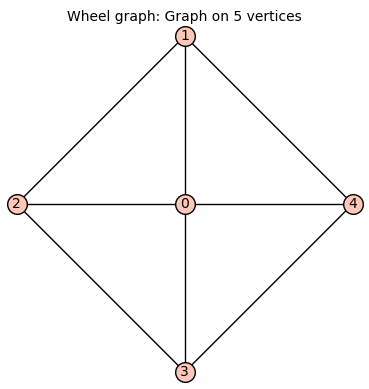

In [79]:
W4 = graphs.WheelGraph(5); W4

In [80]:
check_tw_faces(W4)

ValueError: too many values to unpack (expected 4)

In [81]:
twisted_faces2(W4)

[25, 19, 13, 32, 31, 14, 20, 26, 1, 28, 16, 2, 27, 15, 22, 3, 4, 9, 10, 21, 5, 29, 18, 6, 30, 17, 7, 23, 11, 8, 24, 12]

In [82]:
F = twisted_faces2(K33)

In [83]:
F.cycle_tuples()

[(1, 26, 15, 35, 6, 25, 9, 21),
 (2, 31, 11, 27, 16, 23, 7, 33, 17, 24),
 (3, 32, 18, 29, 4, 20, 8, 28),
 (5, 19, 14, 36, 12, 22, 13, 30, 10, 34)]

In [84]:
K33 = graphs.CompleteBipartiteGraph(3,3)

In [85]:
Pt = graphs.PetersenGraph()

In [86]:
L = sample_number_of_twisted_faces(Pt, samples=1000)

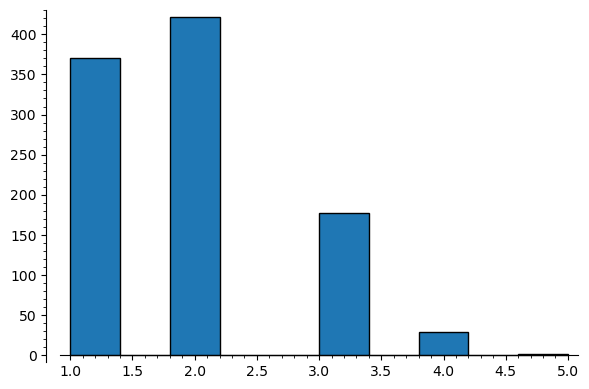

In [87]:
histogram(L).show()

In [88]:
exp_size(L).n()

1.87100000000000

In [89]:
F.cycle_type()

[10, 10, 8, 8]

In [90]:
F.cycle_tuples()

[(1, 26, 15, 35, 6, 25, 9, 21),
 (2, 31, 11, 27, 16, 23, 7, 33, 17, 24),
 (3, 32, 18, 29, 4, 20, 8, 28),
 (5, 19, 14, 36, 12, 22, 13, 30, 10, 34)]

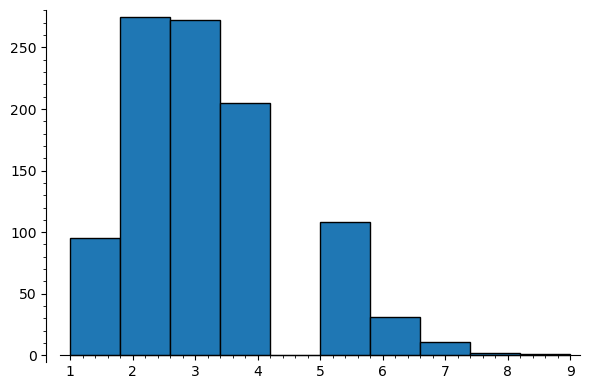

3.10900000000000

In [91]:
G3 = graphs.RandomRegular(3,100)

LG3 = sample_number_of_twisted_faces(G3, samples=1000)

histogram(LG3).show()
exp_size(LG3).n()

In [9]:
G = graphs.CompleteGraph(40)

In [10]:
L = sample_number_of_twisted_faces(G, samples=100)

In [12]:
exp_size(L).n()

3.90000000000000

In [95]:
G2 = graphs.CompleteGraph(80)

In [96]:
L2 = sample_number_of_twisted_faces(G2, samples=100)

In [97]:
exp_size(L2).n()

4.29000000000000

In [98]:
4.552-3.853

0.698999999999999

In [99]:
log(2.)

0.693147180559945

In [100]:
log(80.)

4.38202663467388

In [101]:
log(40.)

3.68887945411394

In [102]:
G3 = graphs.CompleteGraph(120)

In [103]:
L3 = sample_number_of_twisted_faces(G3, samples=100)

In [104]:
exp_size(L3).n()

5.08000000000000

In [105]:
log(120.)

4.78749174278205

In [106]:
type(L3[1])

<class 'sage.rings.rational.Rational'>

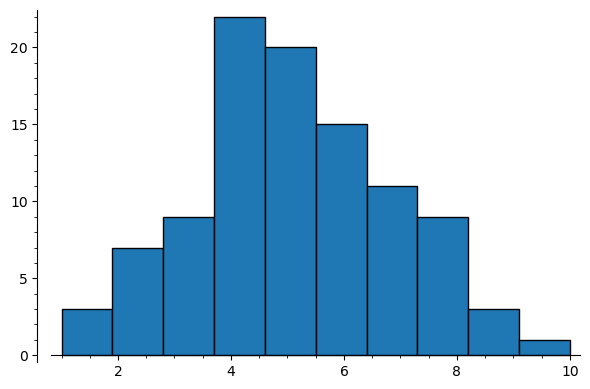

In [107]:
histogram(L3)

In [108]:
np.mean(L3)

5.08

In [109]:
np.var(L3)

3.8135999999999997

In [110]:
np.std(L3)

1.9528440797974629

To be added: counting number of bad edges in a random embedding of a snark, say. Compare orientable vs. nonorientable embedding. 

In [8]:
L = sample_number_of_bad_edges(K4, samples=100)

NameError: name 'sample_number_of_bad_edges' is not defined

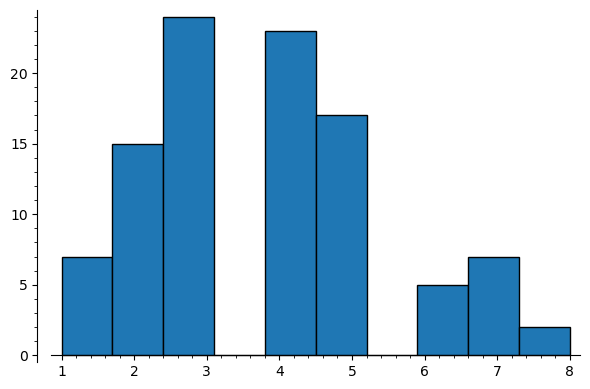

In [112]:
histogram(L)

In [113]:
Pt = graphs.PetersenGraph()

In [114]:
bad_Pt = sample_number_of_bad_edges(Pt, samples=100)

NameError: name 'sample_number_of_bad_edges' is not defined

In [115]:
obad_Pt = sample_number_of_bad_edges(Pt, do_twist=False, samples=100)

NameError: name 'sample_number_of_bad_edges' is not defined

In [116]:
histogram(bad_Pt)

NameError: name 'bad_Pt' is not defined

In [117]:
histogram(obad_Pt)

NameError: name 'obad_Pt' is not defined

In [118]:
np.mean(bad_Pt)/Pt.num_verts()

NameError: name 'bad_Pt' is not defined

In [119]:
np.mean(obad_Pt)/Pt.num_verts()

NameError: name 'obad_Pt' is not defined

In [120]:
bad_Pt.count(0), obad_Pt.count(0)

NameError: name 'bad_Pt' is not defined

In [121]:
F = graphs.FlowerSnark()

In [122]:
bad_F = sample_number_of_bad_edges(F, samples=100)

NameError: name 'sample_number_of_bad_edges' is not defined

In [123]:
obad_F = sample_number_of_bad_edges(F, do_twist=False, samples=100)

NameError: name 'sample_number_of_bad_edges' is not defined

In [124]:
np.mean(bad_F)/F.num_verts()

NameError: name 'bad_F' is not defined

In [125]:
np.mean(obad_F)/F.num_verts()

NameError: name 'obad_F' is not defined

In [126]:
G = graphs.RandomRegular(3,50)

In [127]:
bad_G = sample_number_of_bad_edges(G, samples=100)

NameError: name 'sample_number_of_bad_edges' is not defined

In [128]:
obad_G = sample_number_of_bad_edges(G, do_twist=False, samples=100)

NameError: name 'sample_number_of_bad_edges' is not defined

In [129]:
np.mean(bad_G)/50

NameError: name 'bad_G' is not defined

In [130]:
np.mean(obad_G)/50

NameError: name 'obad_G' is not defined

In [131]:
min(bad_G), min(obad_G)

NameError: name 'bad_G' is not defined

In [132]:
bad_G.count(0), obad_G.count(0)

NameError: name 'bad_G' is not defined

In [133]:
TU = sample_number_of_twisted_faces(G,samples=100)

In [134]:
TO = sample_number_of_twisted_faces(G,do_twist=False,samples=100)

In [135]:
np.mean(TU), np.mean(TO)

(2.78, 3.78)

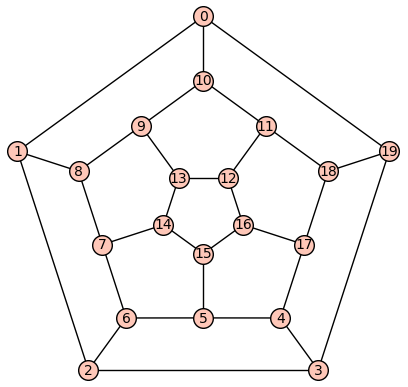

In [136]:
D = graphs.DodecahedralGraph(); D.plot()

In [137]:
bad_D = sample_number_of_bad_edges(D, samples=100)

NameError: name 'sample_number_of_bad_edges' is not defined

In [138]:
obad_D = sample_number_of_bad_edges(D, do_twist=False, samples=100)

NameError: name 'sample_number_of_bad_edges' is not defined

In [139]:
bad_D.count(0), obad_D.count(0)

NameError: name 'bad_D' is not defined

In [140]:
np.mean(bad_D)/20, np.mean(obad_D)/20

NameError: name 'bad_D' is not defined

In [141]:
B1 = graphs.BlanusaFirstSnarkGraph()
B2 = graphs.BlanusaSecondSnarkGraph()

In [142]:
bad_B1 = sample_number_of_bad_edges(B1, samples=100)

NameError: name 'sample_number_of_bad_edges' is not defined

In [143]:
bad_B2 = sample_number_of_bad_edges(B2, samples=100)

NameError: name 'sample_number_of_bad_edges' is not defined

In [144]:
np.mean(bad_B1)/B1.num_verts()

NameError: name 'bad_B1' is not defined

In [145]:
np.mean(obad_B1)/B1.num_verts()

NameError: name 'obad_B1' is not defined

In [146]:
np.mean(bad_B2)/B2.num_verts()

NameError: name 'bad_B2' is not defined

In [147]:
np.mean(obad_B2)/B2.num_verts()

NameError: name 'obad_B2' is not defined

In [148]:
obad_B1 = sample_number_of_bad_edges(B1, do_twist=False, samples=100)

NameError: name 'sample_number_of_bad_edges' is not defined

In [149]:
obad_B2 = sample_number_of_bad_edges(B2, do_twist=False, samples=100)

NameError: name 'sample_number_of_bad_edges' is not defined

In [150]:
K4 = graphs.CompleteGraph(4)

In [151]:
bad_K4 = sample_number_of_bad_edges(K4, samples=100)

NameError: name 'sample_number_of_bad_edges' is not defined

In [152]:
np.mean(bad_K4)/4

NameError: name 'bad_K4' is not defined

In [153]:
bad_K33 = sample_number_of_bad_edges(K33, samples=100)

NameError: name 'sample_number_of_bad_edges' is not defined

In [154]:
np.mean(bad_K33)/6

NameError: name 'bad_K33' is not defined

In [155]:
C = graphs.CycleGraph(19)

In [156]:
K2 = graphs.CompleteGraph(2)

In [157]:
H = C.cartesian_product(K2)

In [158]:
bad_H = sample_number_of_bad_edges(H, samples=100)

NameError: name 'sample_number_of_bad_edges' is not defined

In [159]:
np.mean(bad_H)/H.num_verts()

NameError: name 'bad_H' is not defined